In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
from google.colab import auth
import gspread
from google.auth import default


In [12]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [13]:
worksheet = gc.open('deeplearningexp1').sheet1
data = worksheet.get_all_values()

In [14]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'actual':'float'})
dataset1 = dataset1.astype({'predicted':'float'})

In [15]:
dataset1.head(

)

,actual,predicted
0,2.0,34.0
1,3.0,46.0
2,4.0,58.0
3,5.0,70.0
4,6.0,82.0


In [18]:
X = dataset1[['actual']].values
y = dataset1[['predicted']].values

In [20]:
X

array([[ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.]])

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [22]:
Scaler = MinMaxScaler()


In [23]:
Scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train1 = Scaler.transform(X_train)

**Name:** VINOTH M P


**Register Number:** 212223240182



In [25]:
ai_brain = Sequential([
    Dense(5,activation = 'relu'),
    Dense(4,activation = 'relu'),
    Dense(1)
])
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(X_train1,y_train,epochs = 4000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 45907.4141
Epoch 1502/4000
1/1 [==============================] - 0s 10ms/step - loss: 45907.0195
Epoch 1503/4000
1/1 [==============================] - 0s 12ms/step - loss: 45906.6328
Epoch 1504/4000
1/1 [==============================] - 0s 12ms/step - loss: 45906.2422
Epoch 1505/4000
1/1 [==============================] - 0s 13ms/step - loss: 45905.8594
Epoch 1506/4000
1/1 [==============================] - 0s 11ms/step - loss: 45905.4727
Epoch 1507/4000
1/1 [==============================] - 0s 12ms/step - loss: 45905.0820
Epoch 1508/4000
1/1 [==============================] - 0s 10ms/step - loss: 45904.6953
Epoch 1509/4000
1/1 [==============================] - 0s 9ms/step - loss: 45904.3047
Epoch 1510/4000
1/1 [==============================] - 0s 9ms/step - loss: 45903.9219
Epoch 1511/4000
1/1 [==============================] - 0s 11ms/step - loss: 45903.5273
Epoch 1512/

In [26]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

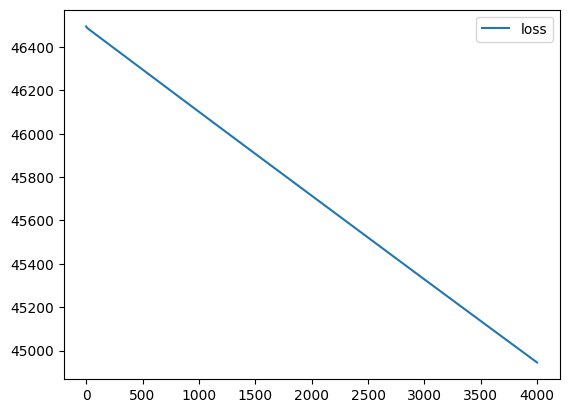

In [27]:
loss_df.plot()

In [28]:
X_test1 = Scaler.transform(X_test)

In [29]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 204ms/step - loss: 40096.9297


40096.9296875

In [30]:
X_n1 = [[30]]

In [31]:
X_n1_1 = Scaler.transform(X_n1)

In [32]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 153ms/step


array([[4.008867]], dtype=float32)